In [241]:
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_colwidth', None)

# unknown symbols replacement

In [2]:
case_data = pd.read_csv('overall_80K.csv', index_col=0).reset_index(drop=True)

In [3]:
case_data.duplicated().sum()

267

In [4]:
print(len(case_data))
case_data = case_data.drop_duplicates(keep='first').reset_index(drop=True)
print(len(case_data))

81146
80879


In [5]:
non_cyrillic_pattern = r'[^a-zA-Zа-яА-Я .,!?@#№0-9()̄]'

# Функция для поиска всех не-кириллических символов в строке
def find_non_cyrillic(text):
    return re.findall(non_cyrillic_pattern, text)

# Применяем функцию ко всем строкам в Series и объединяем результат в один список
all_non_cyrillic_chars = []
case_data.target.apply(lambda x: all_non_cyrillic_chars.extend(find_non_cyrillic(x)))

# Получаем уникальные символы
unique_non_cyrillic_chars = list(set(all_non_cyrillic_chars))
print(unique_non_cyrillic_chars)

[':', '%', '/', 'ӣ', '’', 'ӈ', 'ӑ', '$', 'Ā', '\t', 'ё', '\uf521', '=', "'", '_', '-', '”', 'Ӈ', 'ӯ', '+', '¸', ';', '»', 'Ӣ', '…', '\uf518', 'ӊ', '\xa0', 'є', '\uf50f', '™', 'ў', 'Ӯ', '>', '–', 'ӆ', '—', '[', '¬', '<', '"', 'ē', '\uf52d', 'Ё', '\uf511', 'ō', 'Ō', '«', '\xad', '\uf519', '\\', ']', '\uf529', '\uf513', 'ū', 'ѐ', 'ә', 'Ē', '\uf523', 'ā']


In [6]:
replace_to_space = ['\t', '\r','\xa0'] + [' ' * i for i in range(20, 1, -1)]
to_delete = ['\\', '\xad']
replace_table = {
    '\uf519': 'о̄',
    '\uf523': 'э̄',
    '\uf50f': 'а̄',
    '\uf511': 'ē',
    '\uf529': 'а̄',
    '\uf518': 'о̄',
    '\uf528': 'Я̄',
    '\uf513': 'ё̄',
    '\uf522': 'Э̄',
    '\uf512': 'Ё̄',
    '\uf50e': 'А̄',
    '\uf521': 'ы̄',
    '\uf52d': 'ю̄',
    'ū': 'ӣ'
}

In [7]:
for symb in replace_to_space:
    case_data.target = case_data.target.apply(lambda x: x.replace(symb, ' '))
    case_data.source = case_data.source.apply(lambda x: x.replace(symb, ' '))
for symb in to_delete:
    case_data.target = case_data.target.apply(lambda x: x.replace(symb, ''))
    case_data.source = case_data.source.apply(lambda x: x.replace(symb, ''))
for old, new in replace_table.items():
    case_data.target = case_data.target.apply(lambda x: x.replace(old, new))
case_data.target = case_data.target.apply(lambda x: x.strip())
case_data.source = case_data.source.apply(lambda x: x.strip())

In [8]:
all_non_cyrillic_chars = []
case_data.target.apply(lambda x: all_non_cyrillic_chars.extend(find_non_cyrillic(x)))

# Получаем уникальные символы
unique_non_cyrillic_chars = list(set(all_non_cyrillic_chars))
print(unique_non_cyrillic_chars)

[':', '%', '/', 'ӣ', '’', 'ӈ', 'ӑ', '$', 'Ā', 'ё', '=', "'", '_', '-', '”', 'Ӈ', 'ӯ', '+', '¸', ';', '»', 'Ӣ', '…', 'ӊ', '™', 'є', 'ў', 'Ӯ', '>', '–', 'ӆ', '—', '[', '¬', '<', '"', 'ē', 'Ё', 'ō', 'Ō', '«', ']', 'ѐ', 'ә', 'Ē', 'ā']


In [10]:
case_data

,target,source
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала."
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит."
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.
...,...,...
80874,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение."
80875,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.
80876,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет."
80877,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа."


In [27]:
case_data.to_csv('cleared_v1.1.csv', index=False)

# Classifier training

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as tts

In [24]:
class_df = pd.concat([
    pd.DataFrame({'id': case_data.index, 'text': case_data.target, 'target': 0}),
    pd.DataFrame({'id': case_data.index, 'text': case_data.source, 'target': 1})
], axis=0, ignore_index=True).copy()
class_df

,id,text,target
0,0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,0
1,1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.",0
2,2,Вит са̄мыл сунсым о̄нтыс,0
3,3,"Атаявев, акваг лылынг тагл ворн та тотавев.",0
4,4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",0
...,...,...,...
161753,80874,"Мне кажется, что подобные случаи могут вызывать подозрение.",1
161754,80875,Волосы аккуратно собраны сзади.,1
161755,80876,"В общем, культуры интенсивного потребления меда нет.",1
161756,80877,"Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",1


In [25]:
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4)) # char, (2, 4)

In [26]:
X_vectorized = vectorizer.fit_transform(class_df['text'])

In [27]:
X_vectorized.shape

(161758, 148004)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression(random_state=777, n_jobs=-1, solver='saga')

In [30]:
model.fit(X_vectorized, class_df.target)

LogisticRegression(n_jobs=-1, random_state=777, solver='saga')

In [31]:
class_df['probas'] = model.predict_proba(X_vectorized)[:, 1]
class_df

,id,text,target,probas
0,0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,0,0.037408
1,1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.",0,0.000796
2,2,Вит са̄мыл сунсым о̄нтыс,0,0.004955
3,3,"Атаявев, акваг лылынг тагл ворн та тотавев.",0,0.030277
4,4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",0,0.026322
...,...,...,...,...
161753,80874,"Мне кажется, что подобные случаи могут вызывать подозрение.",1,0.994728
161754,80875,Волосы аккуратно собраны сзади.,1,0.905590
161755,80876,"В общем, культуры интенсивного потребления меда нет.",1,0.886409
161756,80877,"Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",1,0.966875


In [32]:
class_df['abs_diff'] = np.abs(class_df.target - class_df.probas)

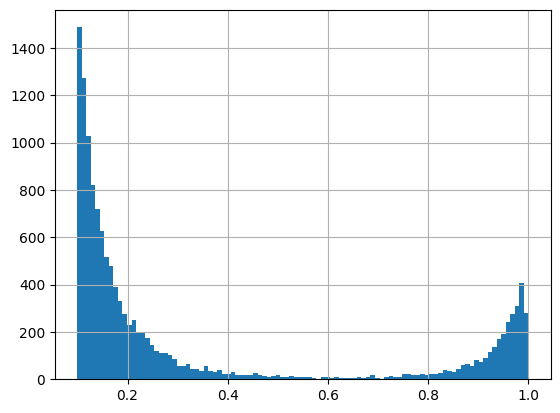

In [33]:
class_df[class_df.abs_diff > 0.1].abs_diff.hist(bins=100)
plt.show()

In [38]:
class_df[(class_df.abs_diff >= 0.65) & (class_df.abs_diff < 0.70)].sort_values('abs_diff')

,id,text,target,probas,abs_diff
78622,78622,Кит тип двусторонний печать о̄лы: стандартный ос печать буклетов.,0,0.650229,0.650229
75743,75743,В больнице разговоры врачей Тамара МЕРОВА записала на мансийском языке.,0,0.651806,0.651806
59594,59594,"Т.П. Бахтиярова ос С.С. Динисламова «Мансийско-русский словарь (верхне-лозьвинский диалект)» нэ̄пак та̄ратасы̄г, О.Ю. Динисламова «Картинный фразеологический словарь», С.Д. Дядюн «Тематические группы слов, представленные в хантыйских сказках».",0,0.655925,0.655925
70344,70344,В чуме работали местные люди.,0,0.656742,0.656742
14403,14403,"Николай Георгиевич мӯйлуптым о̄лыс орденыл "" Отечественной войны 1 степени"", медалитыл ""За боевые заслуги"", ""За победу над Германией в Великой Отечественной войне 1941-1945 г.г."", ""За взятие Вены"", ""Георгий Жуков"".",0,0.657300,0.657300
90885,10006,Эрыг Тоты Эрыг Отыр.,1,0.342665,0.657335
150243,69364,О̄влэ̄т Саша Омск ӯст речной училищат мотористаг ханищтахтас.,1,0.341914,0.658086
69852,69852,"Та̄н акваг та̄кыщ ро̄ӈхим та э̄рге̄гыт: «Есть на Севере хороший городок, там моя подруженька живёт...""",0,0.658650,0.658650
75155,75155,Он об этом говорил.,0,0.659363,0.659363
17959,17959,- Ме - ка! Ме - ка!,0,0.660106,0.660106


In [40]:
case_data.loc[59594:59594]

,target,source
59594,"Т.П. Бахтиярова ос С.С. Динисламова «Мансийско-русский словарь (верхне-лозьвинский диалект)» нэ̄пак та̄ратасы̄г, О.Ю. Динисламова «Картинный фразеологический словарь», С.Д. Дядюн «Тематические группы слов, представленные в хантыйских сказках».","Т.П. Бахтиярова и С.С. Динисламова книгу «Мансийско-русский словарь (верхне-лозьвинский диалект)» издали, О.Ю. Динисламова «Картинный фразеологический словарь», С.Д. Дядюн «Тематические группы слов, представленные в хантыйских сказках»."


In [51]:
case_data_probas = case_data.copy()
case_data_probas = case_data_probas.reset_index().rename(columns={'index': 'id'})
case_data_probas

,id,target,source
0,0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.
1,1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала."
2,2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах
3,3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит."
4,4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.
...,...,...,...
80874,80874,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение."
80875,80875,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.
80876,80876,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет."
80877,80877,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа."


In [55]:
case_data_probas = case_data_probas.merge(
    class_df[class_df.target == 0][['id', 'probas']].rename(columns={'probas': 'target_right_proba'}),
    on='id',
    how='left'
)
case_data_probas.target_right_proba = 1 - case_data_probas.target_right_proba

In [56]:
case_data_probas

,id,target,source,target_right_proba
0,0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.,0.962592
1,1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала.",0.999204
2,2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах,0.995045
3,3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит.",0.969723
4,4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.,0.973678
...,...,...,...,...
80874,80874,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение.",0.999056
80875,80875,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.,0.992377
80876,80876,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет.",0.942251
80877,80877,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",0.742169


In [57]:
case_data_probas = case_data_probas.merge(
    class_df[class_df.target == 1][['id', 'probas']].rename(columns={'probas': 'source_right_proba'}),
    on='id',
    how='left'
)
case_data_probas

,id,target,source,target_right_proba,source_right_proba
0,0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.,0.962592,0.978261
1,1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала.",0.999204,0.998549
2,2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах,0.995045,0.987303
3,3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит.",0.969723,0.976398
4,4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.,0.973678,0.982358
...,...,...,...,...,...
80874,80874,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение.",0.999056,0.994728
80875,80875,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.,0.992377,0.905590
80876,80876,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет.",0.942251,0.886409
80877,80877,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",0.742169,0.966875


In [58]:
case_data_probas = case_data_probas.rename(columns={
    'target': 'mansi',
    'source': 'rus',
    'target_right_proba': 'mansi_right',
    'source_right_proba': 'rus_right'
})
case_data_probas

,id,mansi,rus,mansi_right,rus_right
0,0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.,0.962592,0.978261
1,1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала.",0.999204,0.998549
2,2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах,0.995045,0.987303
3,3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит.",0.969723,0.976398
4,4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.,0.973678,0.982358
...,...,...,...,...,...
80874,80874,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение.",0.999056,0.994728
80875,80875,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.,0.992377,0.905590
80876,80876,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет.",0.942251,0.886409
80877,80877,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",0.742169,0.966875


In [59]:
new_data = case_data_probas.drop(columns=['id']).copy()

In [60]:
new_data

,mansi,rus,mansi_right,rus_right
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.,0.962592,0.978261
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала.",0.999204,0.998549
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах,0.995045,0.987303
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит.",0.969723,0.976398
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.,0.973678,0.982358
...,...,...,...,...
80874,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение.",0.999056,0.994728
80875,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.,0.992377,0.905590
80876,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет.",0.942251,0.886409
80877,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",0.742169,0.966875


In [61]:
new_data.isna().sum()

mansi          0
rus            0
mansi_right    0
rus_right      0
dtype: int64

In [65]:
pd.set_option('display.max_rows', 200)

In [73]:
new_data['right_sum'] = new_data.mansi_right + new_data.rus_right
new_data

,mansi,rus,mansi_right,rus_right,right_sum
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.,0.962592,0.978261,1.940852
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала.",0.999204,0.998549,1.997753
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах,0.995045,0.987303,1.982348
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит.",0.969723,0.976398,1.946121
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.,0.973678,0.982358,1.956036
...,...,...,...,...,...
80874,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение.",0.999056,0.994728,1.993783
80875,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.,0.992377,0.905590,1.897967
80876,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет.",0.942251,0.886409,1.828661
80877,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",0.742169,0.966875,1.709044


In [77]:
new_data = new_data.drop(index=new_data[new_data.mansi == new_data.rus].index).reset_index(drop=True)

In [82]:
new_data = new_data.drop(index=[63676]) # 63676	МАРИЯ ДВИНЯНИНОВА	Мария Двинянинова

## оба языка - мансийский

In [88]:
norm_index = [
    54852,
    55189,
    59798,
    66217,
    70477,
    72450,
    74211,
    74213,
    74888,
    75644,
    76526
]

In [89]:
idx2drop = list(set(new_data[(new_data.mansi_right >= 0.5) & (new_data.rus_right <= 0.5)].index.tolist()) - set(norm_index))
idx2drop

[42369,
 17800,
 10002,
 3995,
 70559,
 43936,
 50977,
 51361,
 24102,
 63917,
 49474,
 11983,
 11091,
 69337,
 43741,
 2785,
 31975,
 50663,
 48109,
 62959,
 74616,
 66297,
 13438]

In [90]:
new_data = new_data.drop(index=idx2drop)

## оба языка - русский

In [98]:
norm_index = [
    12109,
    12233,
    14399,
    32337,
    43320,
    44161,
    44757,
    45062,
    51645,
    54555,
    55694,
    59092,
    59165,
    62448,
    63331,
    63550,
    69820,
    69266,
    70705,
    72380,
    73032,
    74377,
    75441,
    76149,
    76795,
    78450,
    78553,
    78585,
    78637,
    78639,
    79359,
    79412,
    80692
]

In [100]:
idx2drop = new_data[(new_data.mansi_right <= 0.4) & (new_data.rus_right >= 0.5)].drop(index=norm_index).index

In [101]:
new_data = new_data.drop(index=idx2drop)

## языки перепутаны местами

In [103]:
new_data.loc[74211, 'rus'] = 'До сюда если идти, восемь километров.'
new_data.loc[74211, 'mansi'] = 'Тув мус ла̄глыл ё̄муӈкве ке, нёлолов ве̄рыста.'

In [117]:
additional_idx = [
    70477,
    72450,
    74213,
    74377,
    75441,
    69266
]

In [108]:
new_data = new_data.drop(index=[32071])

In [111]:
backup = new_data.copy()

In [118]:
mask = (new_data.mansi_right < 0.5) & (new_data.rus_right < 0.5)
switch_idx = new_data[mask].index.tolist() + additional_idx
old_mansi = new_data.loc[switch_idx].mansi.copy()
old_rus = new_data.loc[switch_idx].rus.copy()

In [119]:
new_data.loc[switch_idx]

,mansi,rus,mansi_right,rus_right,right_sum
3926,"Пусть наступит лето, моей дочери тоже отдельный домик построишь.","Туииг вос тах ēмты, ам а̄гим о̄с я̄нас колыл ӯнттэ̄лын.",0.013232,0.002602,0.015834
4680,Говядину варим.,Мис нё̄выль па̄йтэ̄в.,0.212749,0.031241,0.243990
5598,Сегодня такой хороший и светлый день.,"Тыхо̄тал такем ё̄мас, посыӈ хо̄тал.",0.020835,0.027704,0.048538
18521,Зайчонок скачет,Со̄выр пыгрись порги,0.074788,0.084849,0.159637
18547,Вскоре жена умерла.,Оматэ̄н пувиньтахтуӈкве акваг нё̄тыс.,0.030507,0.026050,0.056557
...,...,...,...,...,...
72450,"Сам постоянно работал, писал книги.","Такви акваг рӯпитас, нэ̄пакыт хансыс.",0.561738,0.041195,0.602933
74213,Сейчас разговор об этом шёл:,Ань потраныл ты урыл о̄лыс:,0.555867,0.143381,0.699248
74377,Мой отец Василий Иванович Лелятов.,А̄тям Василий Иванович Лелятов.,0.086939,0.506725,0.593663
75441,Домашнюю работу делал.,Колсори рӯпата ва̄- рыс.,0.300402,0.685801,0.986203


In [120]:
new_data.loc[switch_idx, 'rus'] = old_mansi.values
new_data.loc[switch_idx, 'mansi'] = old_rus.values

In [121]:
new_data.loc[switch_idx, 'mansi_right'] = 1 - new_data.loc[switch_idx, 'mansi_right']
new_data.loc[switch_idx, 'rus_right'] = 1 - new_data.loc[switch_idx, 'rus_right']

In [123]:
new_data[(new_data.mansi_right < 0.6) & (new_data.rus_right < 0.6)]

,mansi,rus,mansi_right,rus_right,right_sum
32745,"Ома, ома!","Мама, мама!",0.470105,0.526263,0.996368
54584,Та̄-наныл Лариса Николаевна Карпенко (Хозумова) ханищты,Их Лариса Николаевна Карпенко (Хозумова) учит,0.493144,0.593677,1.086821
63051,Альберт Хозумов .,Альберт Хозумов.,0.503831,0.578960,1.082792
74211,"Тув мус ла̄глыл ё̄муӈкве ке, нёлолов ве̄рыста.","До сюда если идти, восемь километров.",0.509965,0.033781,0.543747


In [124]:
new_data.right_sum = new_data.mansi_right + new_data.rus_right

In [127]:
new_data

,mansi,rus,mansi_right,rus_right,right_sum
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.,0.962592,0.978261,1.940852
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала.",0.999204,0.998549,1.997753
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах,0.995045,0.987303,1.982348
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит.",0.969723,0.976398,1.946121
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.,0.973678,0.982358,1.956036
...,...,...,...,...,...
80836,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение.",0.999056,0.994728,1.993783
80837,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.,0.992377,0.905590,1.897967
80838,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет.",0.942251,0.886409,1.828661
80839,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",0.742169,0.966875,1.709044


In [128]:
final_switch_backup = new_data.copy()
final_switch_backup.to_csv('backup_after_switch.csv', index=False)

In [129]:
new_data = new_data.drop(columns=[
    'mansi_right',
    'rus_right',
    'right_sum'
]).reset_index(drop=True)
new_data

,mansi,rus
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала."
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит."
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.
...,...,...
80790,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение."
80791,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.
80792,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет."
80793,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа."


# spaces problem

In [130]:
spaces_pattern = r'(?:\b\w\s+){3,}\w\b'

In [132]:
new_data[new_data.mansi.apply(lambda x: bool(re.findall(spaces_pattern, x)))]

,mansi,rus
46687,"э̄ к в а о̄л ы с , м а̄ н ь а̄гирищ о̄ньщас","У одной женщины была маленькая дочь,"
51826,Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л н э щ е̄ м ья т п а л т хӯл алыщлаӈкве ос во̄раяӈкве воратэ̄гыт.,Сейчас много народу в старых местах живущим людям рыбачить и охотится лезут.
51827,Тот браконьер-ма̄хум са̄в янгуй алмыт ос х о тн у й м а н ы л .,Там браконьеры много лосей добыли и шкуры cняли.
51958,Са̄всыр ма̄ныл ёхталам ма̄щтыр хо̄т п а т т ы в ы ст а в ка сунсуӈкве Силава па̄вылн ялсыт.,С разных мест приезжали мастера выставку смотреть село Силава ходили.
51959,"Ам ще̄мьяӈ та̄гыл са̄лыӈ колт о̄лэ̄гум, хус арыгт е м с а̄ л ы о̄ н ь щ е̄ в .","Я с семьей живу оленеводческом стаде, больше двадцати оленей держали."
...,...,...
78247,"Тот хансым о̄лы, школат соссаӈ ня̄врамыт ма̄гыс х а н и щ т а н н э̄ п а к ы т щ ё̄ п и т а ӈ к в е э̄ р и .","Там написано, школе для местных детей учебники надо готовить."
78252,"ХантыМансийск ӯст о̄лнэ Центр искусств колт лов арыг та̄л рӯпитас, ня̄врамыт м а̄ н ь щ и о с х а н т ы та̄ныт са̄ӈквылтаӈкве ханищтасанэ.","В Городе Ханты-Мансийске больше 10 лет Центр искусств работал, детей манси и ханты учили играть на санквылтапе."
78274,Ты община кӯщаиг Ольга Александровн а Ф о м и ч ё в а о̄л ы .,Начальницей общины является Ольга Александровна Фомичёва.
78276,"То т Р а н д ы м о в ы т , Т а р л и н ы т, В о л д и ныт колта̄глыт хуньт о̄лсыт.","Там когда-то жили семьи Рандымовых, Тарлиных, Волдиных."


In [189]:
from dotenv import load_dotenv
import os
load_dotenv()

True

## gemini

In [147]:
import google.generativeai as genai
load_dotenv()

True

In [148]:
genai.configure(api_key=os.environ.get('GOOGLE_API_KEY'))

In [152]:
sys_prompt = (
    "Перед тобой предложение на мансийском языке и его перевод на русском. "
    "В предложении на мансийском некоторые слова написаны через пробелы. "
    "В предложении на русском тоже такое может быть, но это не важно. "
    "Он представлен здесь, чтобы тебе было проще убрать лишние пробелы в мансийском.\n"
    "Тебе нужно исправить написание на мансийском так, как ты считаешь нужным. "
    "Твой ответ не должен ТОЛЬКО исправленное предложение на мансийском и НИЧЕГО больше.\n\n"
    "Пример:\n\n"
    "Мансийский:\nТо т Р а н д ы м о в ы т , Т а р л и н ы т, В о л д и ныт колта̄глыт хуньт о̄лсыт.\n"
    "Перевод:\nТам когда-то жили семьи Рандымовых, Тарлиных, Волдиных.\n"
    "Твой ответ:\nТот Рандымовыт, Тарлиныт, Волдиныт колта̄глыт хуньт о̄лсыт."
)
print(sys_prompt)

Перед тобой предложение на мансийском языке и его перевод на русском. В предложении на мансийском некоторые слова написаны через пробелы. В предложении на русском тоже такое может быть, но это не важно. Он представлен здесь, чтобы тебе было проще убрать лишние пробелы в мансийском.
Тебе нужно исправить написание на мансийском так, как ты считаешь нужным. Твой ответ не должен ТОЛЬКО исправленное предложение на мансийском и НИЧЕГО больше.

Пример:

Мансийский:
То т Р а н д ы м о в ы т , Т а р л и н ы т, В о л д и ныт колта̄глыт хуньт о̄лсыт.
Перевод:
Там когда-то жили семьи Рандымовых, Тарлиных, Волдиных.
Твой ответ:
Тот Рандымовыт, Тарлиныт, Волдиныт колта̄глыт хуньт о̄лсыт.


In [162]:
model = genai.GenerativeModel(
    "gemini-1.5-flash-exp-0827",
    system_instruction=sys_prompt
)

In [170]:
new_data['mansi_wout_spaces'] = None
new_data

,mansi,rus,mansi_wout_spaces
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.,None
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала.",None
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах,None
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит.",None
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.,None
...,...,...,...
80790,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение.",None
80791,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.,None
80792,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет.",None
80793,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",None


In [171]:
mask = new_data.mansi.apply(lambda x: bool(re.findall(spaces_pattern, x)))
temp = new_data[mask]
temp

,mansi,rus,mansi_wout_spaces
46687,"э̄ к в а о̄л ы с , м а̄ н ь а̄гирищ о̄ньщас","У одной женщины была маленькая дочь,",None
51826,Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л н э щ е̄ м ья т п а л т хӯл алыщлаӈкве ос во̄раяӈкве воратэ̄гыт.,Сейчас много народу в старых местах живущим людям рыбачить и охотится лезут.,None
51827,Тот браконьер-ма̄хум са̄в янгуй алмыт ос х о тн у й м а н ы л .,Там браконьеры много лосей добыли и шкуры cняли.,None
51958,Са̄всыр ма̄ныл ёхталам ма̄щтыр хо̄т п а т т ы в ы ст а в ка сунсуӈкве Силава па̄вылн ялсыт.,С разных мест приезжали мастера выставку смотреть село Силава ходили.,None
51959,"Ам ще̄мьяӈ та̄гыл са̄лыӈ колт о̄лэ̄гум, хус арыгт е м с а̄ л ы о̄ н ь щ е̄ в .","Я с семьей живу оленеводческом стаде, больше двадцати оленей держали.",None
...,...,...,...
78247,"Тот хансым о̄лы, школат соссаӈ ня̄врамыт ма̄гыс х а н и щ т а н н э̄ п а к ы т щ ё̄ п и т а ӈ к в е э̄ р и .","Там написано, школе для местных детей учебники надо готовить.",None
78252,"ХантыМансийск ӯст о̄лнэ Центр искусств колт лов арыг та̄л рӯпитас, ня̄врамыт м а̄ н ь щ и о с х а н т ы та̄ныт са̄ӈквылтаӈкве ханищтасанэ.","В Городе Ханты-Мансийске больше 10 лет Центр искусств работал, детей манси и ханты учили играть на санквылтапе.",None
78274,Ты община кӯщаиг Ольга Александровн а Ф о м и ч ё в а о̄л ы .,Начальницей общины является Ольга Александровна Фомичёва.,None
78276,"То т Р а н д ы м о в ы т , Т а р л и н ы т, В о л д и ныт колта̄глыт хуньт о̄лсыт.","Там когда-то жили семьи Рандымовых, Тарлиных, Волдиных.",None


In [173]:
new_data[mask]

,mansi,rus,mansi_wout_spaces
46687,"э̄ к в а о̄л ы с , м а̄ н ь а̄гирищ о̄ньщас","У одной женщины была маленькая дочь,",э̄ква о̄лыс ма̄нь а̄гирищ о̄ньщас\n
51826,Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л н э щ е̄ м ья т п а л т хӯл алыщлаӈкве ос во̄раяӈкве воратэ̄гыт.,Сейчас много народу в старых местах живущим людям рыбачить и охотится лезут.,Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л неще̄мьят палт хӯлалыщлаӈкве ос во̄раяӈкве воратэ̄гыт.\n
51827,Тот браконьер-ма̄хум са̄в янгуй алмыт ос х о тн у й м а н ы л .,Там браконьеры много лосей добыли и шкуры cняли.,Тот браконьер-ма̄хум са̄в янгуй алмыт ос хотнуйманыл.\n
51958,Са̄всыр ма̄ныл ёхталам ма̄щтыр хо̄т п а т т ы в ы ст а в ка сунсуӈкве Силава па̄вылн ялсыт.,С разных мест приезжали мастера выставку смотреть село Силава ходили.,Са̄всыр ма̄ныл ёхталам ма̄щтыр хо̄т паттывыстав ка сунсуӈкве Силава па̄вылн ялсыт.\n
51959,"Ам ще̄мьяӈ та̄гыл са̄лыӈ колт о̄лэ̄гум, хус арыгт е м с а̄ л ы о̄ н ь щ е̄ в .","Я с семьей живу оленеводческом стаде, больше двадцати оленей держали.","Ам ще̄мьяӈ та̄гыл са̄лыӈ колто̄лэ̄гум, хус арыгт е̄мса̄лыо̄ньще̄в.\n"
...,...,...,...
78247,"Тот хансым о̄лы, школат соссаӈ ня̄врамыт ма̄гыс х а н и щ т а н н э̄ п а к ы т щ ё̄ п и т а ӈ к в е э̄ р и .","Там написано, школе для местных детей учебники надо готовить.",None
78252,"ХантыМансийск ӯст о̄лнэ Центр искусств колт лов арыг та̄л рӯпитас, ня̄врамыт м а̄ н ь щ и о с х а н т ы та̄ныт са̄ӈквылтаӈкве ханищтасанэ.","В Городе Ханты-Мансийске больше 10 лет Центр искусств работал, детей манси и ханты учили играть на санквылтапе.",None
78274,Ты община кӯщаиг Ольга Александровн а Ф о м и ч ё в а о̄л ы .,Начальницей общины является Ольга Александровна Фомичёва.,None
78276,"То т Р а н д ы м о в ы т , Т а р л и н ы т, В о л д и ныт колта̄глыт хуньт о̄лсыт.","Там когда-то жили семьи Рандымовых, Тарлиных, Волдиных.",None


In [172]:
for cur_idx, row in tqdm(temp.iterrows(), total=len(temp)):
    user_prompt = (
        f"Мансийский:\n{row.mansi}\n"
        f"Перевод:\n{row.rus}\n"
        f"Твой ответ:\n"
    )
    response = model.generate_content(user_prompt)
    new_data.loc[cur_idx, 'mansi_wout_spaces'] = response.text

  0%|          | 0/862 [00:00<?, ?it/s]

ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

## gemma

In [188]:
new_data.to_csv('data_before_spaces.csv', index=False)

In [203]:
import requests
import json

In [228]:
sys_prompt = (
    "Перед тобой предложение на мансийском языке и его перевод на русском. "
    "В предложении на мансийском некоторые слова написаны через пробелы. "
    "В предложении на русском тоже такое может быть, но это не важно. "
    "Он представлен здесь, чтобы тебе было проще убрать лишние пробелы в мансийском.\n"
    "Тебе нужно только убрать лишние пробелы в предложении на мансийском языке. "
    "Если не знаешь, как правильно это сделать, сделай так, как ты считаешь будет правильно.\n"
    "Твой ответ не должен ТОЛЬКО исправленное предложение на мансийском и НИЧЕГО больше.\n\n"
    "Пример:\n\n"
    "Мансийский:\nТо т Р а н д ы м о в ы т , Т а р л и н ы т, В о л д и ныт колта̄глыт хуньт о̄лсыт.\n"
    "Перевод:\nТам когда-то жили семьи Рандымовых, Тарлиных, Волдиных.\n"
    "Твой ответ:\nТот Рандымовыт, Тарлиныт, Волдиныт колта̄глыт хуньт о̄лсыт."
)
print(sys_prompt)

Перед тобой предложение на мансийском языке и его перевод на русском. В предложении на мансийском некоторые слова написаны через пробелы. В предложении на русском тоже такое может быть, но это не важно. Он представлен здесь, чтобы тебе было проще убрать лишние пробелы в мансийском.
Тебе нужно только убрать лишние пробелы в предложении на мансийском языке. Если не знаешь, как правильно это сделать, сделай так, как ты считаешь будет правильно.
Твой ответ не должен ТОЛЬКО исправленное предложение на мансийском и НИЧЕГО больше.

Пример:

Мансийский:
То т Р а н д ы м о в ы т , Т а р л и н ы т, В о л д и ныт колта̄глыт хуньт о̄лсыт.
Перевод:
Там когда-то жили семьи Рандымовых, Тарлиных, Волдиных.
Твой ответ:
Тот Рандымовыт, Тарлиныт, Волдиныт колта̄глыт хуньт о̄лсыт.


In [245]:
def get_query(sys_prompt, user_prompt):
    response = requests.post(
      url="https://openrouter.ai/api/v1/chat/completions",
      headers={
        "Authorization": f"Bearer {os.environ['OPENROUTER_KEY']}"
      },
      data=json.dumps({
        "model": "google/gemma-2-9b-it:free", # Optional
        "messages": [
          { "role": "user", "content": sys_prompt },
          { "role": "user", "content": 'Убери лишние пробелы в предложении на мансийском.\n' + user_prompt }
        ],
         "temperature": 0.1,
          
          
      })
    )
    return response.json()['choices'][0]['message']['content'].replace('\n', '').strip()

In [240]:
mask = new_data.mansi.apply(lambda x: bool(re.findall(spaces_pattern, x)))
temp = new_data[mask]
temp

,mansi,rus,mansi_wout_spaces
46687,"э̄ к в а о̄л ы с , м а̄ н ь а̄гирищ о̄ньщас","У одной женщины была маленькая дочь,",э̄ква о̄лыс ма̄нь а̄гирищ о̄ньщас\n
51826,Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л н э щ е̄ м ья т п а л т хӯл алыщлаӈкве ос во̄раяӈкве воратэ̄гыт.,Сейчас много народу в старых местах живущим людям рыбачить и охотится лезут.,Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л неще̄мьят палт хӯлалыщлаӈкве ос во̄раяӈкве воратэ̄гыт.\n
51827,Тот браконьер-ма̄хум са̄в янгуй алмыт ос х о тн у й м а н ы л .,Там браконьеры много лосей добыли и шкуры cняли.,Тот браконьер-ма̄хум са̄в янгуй алмыт ос хотнуйманыл.\n
51958,Са̄всыр ма̄ныл ёхталам ма̄щтыр хо̄т п а т т ы в ы ст а в ка сунсуӈкве Силава па̄вылн ялсыт.,С разных мест приезжали мастера выставку смотреть село Силава ходили.,Са̄всыр ма̄ныл ёхталам ма̄щтыр хо̄т паттывыстав ка сунсуӈкве Силава па̄вылн ялсыт.\n
51959,"Ам ще̄мьяӈ та̄гыл са̄лыӈ колт о̄лэ̄гум, хус арыгт е м с а̄ л ы о̄ н ь щ е̄ в .","Я с семьей живу оленеводческом стаде, больше двадцати оленей держали.","Ам ще̄мьяӈ та̄гыл са̄лыӈ колто̄лэ̄гум, хус арыгт е̄мса̄лыо̄ньще̄в.\n"
...,...,...,...
78247,"Тот хансым о̄лы, школат соссаӈ ня̄врамыт ма̄гыс х а н и щ т а н н э̄ п а к ы т щ ё̄ п и т а ӈ к в е э̄ р и .","Там написано, школе для местных детей учебники надо готовить.",None
78252,"ХантыМансийск ӯст о̄лнэ Центр искусств колт лов арыг та̄л рӯпитас, ня̄врамыт м а̄ н ь щ и о с х а н т ы та̄ныт са̄ӈквылтаӈкве ханищтасанэ.","В Городе Ханты-Мансийске больше 10 лет Центр искусств работал, детей манси и ханты учили играть на санквылтапе.",None
78274,Ты община кӯщаиг Ольга Александровн а Ф о м и ч ё в а о̄л ы .,Начальницей общины является Ольга Александровна Фомичёва.,None
78276,"То т Р а н д ы м о в ы т , Т а р л и н ы т, В о л д и ныт колта̄глыт хуньт о̄лсыт.","Там когда-то жили семьи Рандымовых, Тарлиных, Волдиных.",None


In [248]:
j = 1
for cur_idx, row in tqdm(temp.iloc[j:].iterrows(), total=len(temp.iloc[j:])):
    display(row)
    user_prompt = (
        f"Мансийский:\n{row.mansi}\n"
        f"Перевод:\n{row.rus}\n"
        f"Твой ответ:\n"
    )
    result = get_query(sys_prompt, user_prompt)
    #new_data.loc[cur_idx, 'mansi_wout_spaces'] = response.text
    break

  0%|          | 0/861 [00:00<?, ?it/s]

mansi                Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л н э щ е̄ м ья т п а л т хӯл алыщлаӈкве ос во̄раяӈкве воратэ̄гыт.
rus                                        Сейчас много народу в старых местах живущим людям рыбачить и охотится лезут.
mansi_wout_spaces            Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л неще̄мьят палт хӯлалыщлаӈкве ос во̄раяӈкве воратэ̄гыт.\n
Name: 51826, dtype: object

In [249]:
result

'Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л н э щ е̄ м ья т п а л т хӯл алыщлаӈкве ос во̄раяӈкве воратэ̄гыт.'

## deletion

In [260]:
new_data = pd.read_csv('data_before_spaces.csv').drop(columns={'mansi_wout_spaces'})

In [261]:
new_data

,mansi,rus
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала."
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит."
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.
...,...,...
80790,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение."
80791,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.
80792,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет."
80793,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа."


In [263]:
new_data = new_data[~mask]

In [267]:
new_data = new_data.rename(columns={'mansi': 'target', 'rus': 'source'})
new_data

,target,source
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала."
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит."
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.
...,...,...
80790,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение."
80791,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.
80792,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет."
80793,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа."


In [ ]:
new_data.to_csv('')